In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline


In [3]:
import os
import PIL
import pathlib

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin=dataset_url,untar=True)

228827136/228813984 [==============================] - 1s 0us/step


In [7]:
data_dir             # datalarımız nerede ? 

'/root/.keras/datasets/flower_photos'

In [8]:
data_dir = pathlib.Path(data_dir)

In [10]:
data_dir                         # path objesine datayı dönüştürmüş olduk

PosixPath('/root/.keras/datasets/flower_photos')

In [11]:
## kaç tane data indirmişim ? 

In [12]:
data_dir.glob("*/*.jpg")          # klasörlerin hepsinin içerisine bak diyoruz
           # */*. bütün klasörle ve bütün filelar demektir. 

<generator object Path.glob at 0x7f5d6313bf50>

In [14]:
list(data_dir.glob("*/*.jpg") )           # bütün klasörleri ve bütün imageları görebiliyoruz.

[PosixPath('/root/.keras/datasets/flower_photos/sunflowers/5042785753_392cc4e74d_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/1044296388_912143e1d4.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/5007598545_90e08e81c1_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/12471441503_d188b5f31a_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/4933229479_c1708bd503.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/15108515192_f686dce398_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/2767688889_b176b0c3fb.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/15069459615_7e0fd61914_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/15118243470_7e0a7f159c_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/9904127656_f76a5a4811_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/9651392844_77f90589ba_n.jpg'),
 PosixPath('

In [16]:
len(list(data_dir.glob("*/*.jpg") ) )              # 3670 tane img indirdik.

3670

In [17]:
roses = list(data_dir.glob("roses/*"))
roses

[PosixPath('/root/.keras/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4325834819_ab56661dcc_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/14747962886_2bff6bb323_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/8667101118_87ea757b15.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/5212885371_fe27c406a2_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/6163179241_f093f45d95_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/13235124703_a7e1266e44.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4588034197_e300b0872a_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3475572132_01ae28e834_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/13231224664_4a

In [18]:
# bunlar hala path objecsi halinde.

In [19]:
roses[0]

PosixPath('/root/.keras/datasets/flower_photos/roses/15011625580_7974c44bce.jpg')

In [20]:
str(roses[0])     # pathi direk str olarak alabiliriz tabiki.

'/root/.keras/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'

## peki ben bu resimi nasıl açacağım ? 

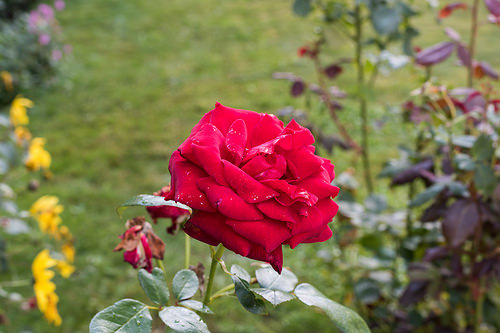

In [22]:
PIL.Image.open(str(roses[0]) )

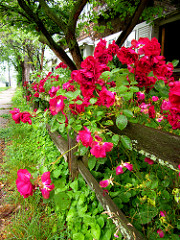

In [30]:
PIL.Image.open(str(roses[18]) )

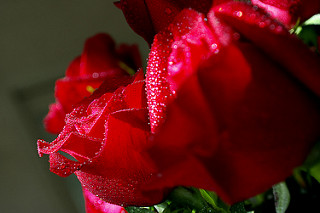

In [32]:
PIL.Image.open(str(roses[48]) )

In [27]:
# bize numpy arrayi olarak vermedi datayı bu sefer direk image olarak verdi bize datayı BİZİM BUNU İMAGE'DAN ÇIKARMAMIZ GEREKİYOR AMA MEMORY İÇİN 
# ZOR OLABİLECEĞİ İÇİN YAPMAMIZ GEREKEN ŞEY : KULLAN AT GİBİ BİR YÖNTEM UYGULAYCAĞIZ

## dikkat resimlerin boyutu da aynı değil bizim için boyutların aynı olması gerekiyor.

In [37]:
batch_size  = 32
height = 180   # satır                               # STANDARTLAŞTIRACAĞIZ .
width = 180    # sütun

In [35]:
list(data_dir.glob("*/"))

[PosixPath('/root/.keras/datasets/flower_photos/sunflowers'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/roses'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion')]

In [39]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               image_size=(height,width),
                                                               batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [40]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               seed=123,
                                                               image_size=(height,width),
                                                               batch_size=32)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


## BİZE BURADA NUMPY ARRAYİ OLARAK DEĞİL DE TENSÖR TİPİNDE ÜRETİYOR İMAGESLARI BİZİM PLT FONKSİYONUNU KULLANABİLMEMİZ İÇİN ARRAY'E ÇEVİRMEMİZ GEREKECEK !!!!!!!

In [43]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

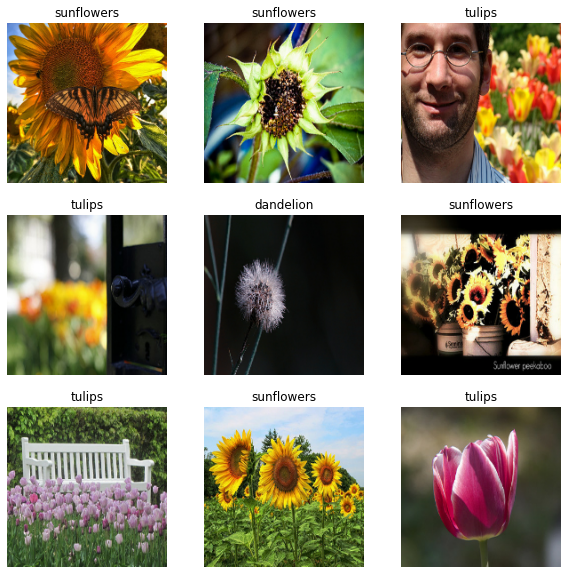

In [44]:
plt.figure(figsize=(10,10))

                          # imageların hepsini  32'lik 1 tane batch çeksin diye train_ds.take(1):
for images , labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1) 
    plt.imshow(images[i].numpy().astype("uint8"))             #   uint8 ------> 8 byte
    plt.title(class_names[labels[i]])
    plt.axis("off")                            

In [45]:
for image_batch , labels_batc in train_ds:
  # böyle yaparsak sonsuza kadar devam eder o yüzden :
  print(image_batch.shape)
  print(labels_batc.shape)
  break

(32, 180, 180, 3)
(32,)


In [47]:
## 180*180 *3(rgb renkli fotolar) 32 tane 180*180'lik renkli resimlerim var.

In [48]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## cache'den alırken : prefetch(buffer_size=tf.data.AUTOTUNE) : batch'İn bitmesine yakın diğer batch'i de hazırlamaya başla diyoruz bu kod satırıyla
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [49]:
## datayı normalize işlemini mimarinin içerisinde de yapabiliriz :

In [62]:
model = tf.keras.models.Sequential([
    
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape = (height,width,3)),
  

  tf.keras.layers.Conv2D(64,kernel_size=3,activation="relu") ,
                          # böyle yazıncada 3*3'lük alabiliyor
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Conv2D(32,3,activation="relu"),
                          
  tf.keras.layers.MaxPool2D(),
  
  tf.keras.layers.Conv2D(16,3,activation="relu"),

  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128,activation="relu"),
  
  tf.keras.layers.Dense(5,activation = "softmax")

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 16)       

In [63]:
model.compile(optimizer = "adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True) , metrics = ["accuracy"])

In [65]:
history = model.fit(train_ds,validation_data = val_ds,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 21s 59ms/step - loss: 1.3465 - accuracy: 0.4077 - val_loss: 1.1721 - val_accuracy: 0.4973
Epoch 2/10
92/92 [==============================] - 4s 40ms/step - loss: 1.0541 - accuracy: 0.5807 - val_loss: 1.0184 - val_accuracy: 0.6022
Epoch 3/10
92/92 [==============================] - 4s 41ms/step - loss: 0.9553 - accuracy: 0.6318 - val_loss: 0.9331 - val_accuracy: 0.6362
Epoch 4/10
92/92 [==============================] - 4s 40ms/step - loss: 0.7821 - accuracy: 0.7050 - val_loss: 0.8840 - val_accuracy: 0.6512
Epoch 5/10
92/92 [==============================] - 4s 41ms/step - loss: 0.6432 - accuracy: 0.7589 - val_loss: 0.9152 - val_accuracy: 0.6444
Epoch 6/10
92/92 [==============================] - 4s 40ms/step - loss: 0.4870 - accuracy: 0.8147 - val_loss: 1.0547 - val_accuracy: 0.6226
Epoch 7/10
92/92 [==============================] - 4s 41ms/step - loss: 0.3729 - accuracy: 0.8716 - val_loss: 1.0329 - val_accuracy: 0.6540
Epoch 8/10
92/92 [=====

In [66]:
## overfitting durumu gayet net gözüküyor.

In [67]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,1.346480,0.407698,1.172089,0.497275
1,1.054068,0.580722,1.018393,0.602180
2,0.955262,0.631812,0.933074,0.636240
3,0.782135,0.705041,0.883994,0.651226
4,0.643210,0.758856,0.915221,0.644414
5,0.487014,0.814714,1.054730,0.622616
6,0.372915,0.871594,1.032852,0.653951
7,0.285813,0.901907,1.296051,0.619891
8,0.206286,0.932221,1.377357,0.653951
9,0.099389,0.970027,1.718230,0.622616


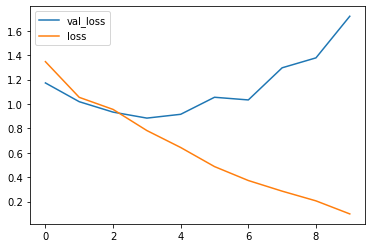

In [68]:
df[["val_loss","loss"]].plot()